In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run scripts/helper.py

In [3]:
crowd_train = load_file('./data/train.csv/train.csv', index_col='id')
crowd_test = load_file('./data/test.csv/test.csv', index_col='id')

In [4]:
# structure of the training and test dataset
crowd_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10158 entries, 1 to 32668
Data columns (total 5 columns):
query                  10158 non-null object
product_title          10158 non-null object
product_description    10158 non-null object
median_relevance       10158 non-null int64
relevance_variance     10158 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 357.1+ KB


In [5]:
# structure of the test dataset
crowd_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22513 entries, 3 to 32671
Data columns (total 3 columns):
query                  22513 non-null object
product_title          22513 non-null object
product_description    22513 non-null object
dtypes: object(3)
memory usage: 439.7+ KB


In [8]:
## Question 1: Length of text in response to search query
crowd_train['length'] = crowd_train.apply(lambda x: len(x['product_title'] + x['product_description']), axis=1)

In [9]:
crowd_train.length.describe()

count    10158.000000
mean       447.585942
std        591.602290
min          8.000000
25%        100.000000
50%        319.000000
75%        596.000000
max      19615.000000
Name: length, dtype: float64

### Mean length is 447 characters

In [10]:
# lets find out shortest query result
crowd_train[crowd_train.length == 8]

,query,product_title,product_description,median_relevance,relevance_variance,length
id,,,,,,
17684,yoga mat,Yoga Mat,,4,0,8


In [20]:
# lets find out whether response contains query string or not
f = lambda x: int(x['query'].lower() in x['product_title'].lower() or x['query'].lower() in x['product_description'].lower())
crowd_train['contains_query'] = crowd_train.apply(f, axis=1)

In [21]:
g = crowd_train.groupby(['median_relevance', 'contains_query'])

In [22]:
g.size()

median_relevance  contains_query
1                 0                  719
                  1                   55
2                 0                 1192
                  1                  284
3                 0                 1213
                  1                  524
4                 0                 3573
                  1                 2598
dtype: int64

In [26]:
crowd_train['log_length'] = np.log1p(crowd_train['length'])

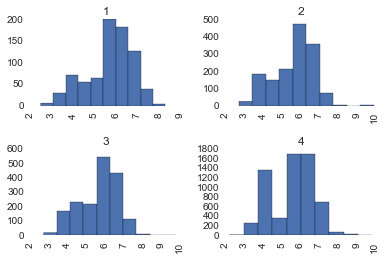

In [28]:
crowd_train.hist(column='log_length', by='median_relevance');

In [41]:
# lets find out the longest description
crowd_train[crowd_train.length == 19615.000000].product_description.values

array([ '<ul>\n\t\t<li>\n\t\t\tEnglish \n\t\t\t\t</li>\n    \t<li>\n    \t\t    \n    \t</li>\n    \t<li>\n    \t\t\t \n    \t\t\t \n    \t\t</li>\n    \t</ul>\n\n    \n\t\t\tThis translation tool is for your convenience only. The accuracy and accessibility of the resulting translation is not guaranteed.\n\t\n\t\n\n\n\n\t\t\n\t\t\n\t\t\t\t\t\t\t<ul>\n\t\t\t\t\t\t\t\t<li>\n\t\t\t\t\t\t\t\t\t\tEnglishEnglish\n\t\t\t\t\t\t\t\t\t\t\t</li>\n\t\t\t\t\t\t\t\t<li>\n\t\t\t\t\t\t\t\xd8\xa7\xd9\x84\xd8\xb9\xd8\xb1\xd8\xa8\xd9\x8a\xd8\xa9Arabic\n\t\t\t\t\t\t\t\t</li>\n\t\t\t\t\t<li>\n\t\t\t\t\t\t\t\xe4\xb8\xad\xe6\x96\x87\xef\xbc\x88\xe7\xae\x80\xe4\xbd\x93\xef\xbc\x89Chinese (Simplified)\n\t\t\t\t\t\t\t\t</li>\n\t\t\t\t\t<li>\n\t\t\t\t\t\t\t\xe4\xb8\xad\xe6\x96\x87\xef\xbc\x88\xe7\xb9\x81\xe4\xbd\x93\xef\xbc\x89Chinese (Traditional)\n\t\t\t\t\t\t\t\t</li>\n\t\t\t\t\t<li>\n\t\t\t\t\t\t\t\xc4\x8ceskyCzech\n\t\t\t\t\t\t\t\t</li>\n\t\t\t\t\t<li>\n\t\t\t\t\t\t\tNederlandsDutch\n\t\t\t\t\t\t\t\t</li>\n

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [74]:
traindata = prepareText(crowd_train.head(10))

In [75]:
tfidf = TfidfVectorizer(min_df=3, max_features=None, 
            strip_accents='unicode', analyzer='char',
            ngram_range=(1, 5), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
Xt = tfidf.fit_transform(traindata)

In [64]:
## hand crafted features
hand_crafted_features = np.array([crowd_train.length, crowd_train.contains_query]).T

In [67]:
only_one_features = hand_crafted_features[0]

In [68]:
from scipy import sparse

In [69]:
final_feature = sparse.hstack([Xt, only_one_features]).tocsr()

In [71]:
final_feature.data

array([  5.51224422e-01,   2.39662792e-02,   4.79325584e-02,
         7.18988376e-02,   2.39662792e-02,   4.79325584e-02,
         2.39662792e-02,   4.79325584e-02,   2.39662792e-02,
         4.79325584e-02,   4.79325584e-02,   4.79325584e-02,
         2.39662792e-02,   4.79325584e-02,   2.39662792e-02,
         4.79325584e-02,   2.39662792e-02,   2.39662792e-02,
         2.39662792e-02,   2.39662792e-02,   4.79325584e-02,
         2.39662792e-02,   2.39662792e-02,   2.39662792e-02,
         4.79325584e-02,   4.79325584e-02,   2.63629071e-01,
         2.39662792e-02,   9.58651168e-02,   2.39662792e-02,
         2.39662792e-02,   4.79325584e-02,   4.79325584e-02,
         9.58651168e-02,   4.79325584e-02,   4.79325584e-02,
         1.67763954e-01,   4.79325584e-02,   4.79325584e-02,
         4.79325584e-02,   2.39662792e-02,   1.91730234e-01,
         4.79325584e-02,   2.39662792e-02,   2.39662792e-02,
         2.39662792e-02,   7.18988376e-02,   3.11561630e-01,
         7.18988376e-02,